IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
car = pd.read_csv(r"C:\Users\Swagatika Samal\Desktop\TRAINITY\PYTHON\CAR_DATA\Analyzing the Impact of Car Features on Price and Profitability.xlsx - Car_data.csv")

In [3]:
car.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335,6,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


EDA

In [4]:
car.shape

(11199, 16)

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11199 entries, 0 to 11198
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11199 non-null  object 
 1   Model              11199 non-null  object 
 2   Year               11199 non-null  int64  
 3   Engine Fuel Type   11199 non-null  object 
 4   Engine HP          11199 non-null  int64  
 5   Engine Cylinders   11199 non-null  int64  
 6   Transmission Type  11199 non-null  object 
 7   Driven_Wheels      11199 non-null  object 
 8   Number of Doors    11193 non-null  float64
 9   Market Category    7823 non-null   object 
 10  Vehicle Size       11199 non-null  object 
 11  Vehicle Style      11199 non-null  object 
 12  highway MPG        11199 non-null  int64  
 13  city mpg           11199 non-null  int64  
 14  Popularity         11199 non-null  int64  
 15  MSRP               11199 non-null  int64  
dtypes: float64(1), int64(7

In [6]:
car_cat=car.select_dtypes(include = 'object')
car_num=car.select_dtypes(include = np.number)
print('Continuous variables are : ',car_num.columns)
print('Categorical Columns are : ',car_cat.columns)

Continuous variables are :  Index(['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')
Categorical Columns are :  Index(['Make', 'Model', 'Engine Fuel Type', 'Transmission Type',
       'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style'],
      dtype='object')


In [7]:
car_cat.head()

,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style
0,BMW,1 Series M,premium unleaded (required),MANUAL,rear wheel drive,"Factory Tuner,Luxury,High-Performance",Compact,Coupe
1,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Convertible
2,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,High-Performance",Compact,Coupe
3,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Coupe
4,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Luxury,Compact,Convertible


In [8]:
car_cat.describe()

,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style
count,11199,11199,11199,11199,11199,7823,11199,11199
unique,48,915,10,5,4,71,3,16
top,Chevrolet,Silverado 1500,regular unleaded,AUTOMATIC,front wheel drive,Crossover,Compact,Sedan
freq,1083,156,6661,7932,4354,1075,4395,2843


In [9]:
car_num.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
0,2011,335,6,2.0,26,19,3916,46135
1,2011,300,6,2.0,28,19,3916,40650
2,2011,300,6,2.0,28,20,3916,36350
3,2011,230,6,2.0,28,18,3916,29450
4,2011,230,6,2.0,28,18,3916,34500


In [10]:
car_num.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11199.000000,11199.000000,11199.000000,11193.000000,11199.000000,11199.000000,11199.000000,1.119900e+04
mean,2010.714528,253.503884,5.650772,3.454123,26.610590,19.731851,1558.483347,4.192593e+04
std,7.228211,110.668806,1.818353,0.872946,8.977641,9.177555,1445.668872,6.153505e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,171.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.159950e+04
50%,2015.000000,239.000000,6.000000,4.000000,25.000000,18.000000,1385.000000,3.067500e+04
75%,2016.000000,303.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.303250e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [11]:
car.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        0
Engine HP               0
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3376
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [12]:
#Display rows with null values
df1 = car[car.isnull().any(axis=1)]
df1

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
82,Nissan,200SX,1996,regular unleaded,115,4,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,36,26,2009,2000
85,Nissan,200SX,1997,regular unleaded,115,4,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,35,25,2009,2000
86,Nissan,200SX,1998,regular unleaded,115,4,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,35,25,2009,2000
191,Chrysler,300,2015,regular unleaded,300,6,AUTOMATIC,all wheel drive,4.0,NaN,Large,Sedan,27,18,1013,37570
192,Chrysler,300,2015,regular unleaded,292,6,AUTOMATIC,rear wheel drive,4.0,NaN,Large,Sedan,31,19,1013,31695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11079,Subaru,XT,1991,regular unleaded,145,6,MANUAL,all wheel drive,2.0,NaN,Compact,Coupe,23,16,640,2000
11094,Toyota,Yaris iA,2017,regular unleaded,106,4,MANUAL,front wheel drive,4.0,NaN,Compact,Sedan,39,30,2031,15950
11095,Toyota,Yaris iA,2017,regular unleaded,106,4,AUTOMATIC,front wheel drive,4.0,NaN,Compact,Sedan,40,32,2031,17050
11152,GMC,Yukon,2015,premium unleaded (recommended),420,8,AUTOMATIC,rear wheel drive,4.0,NaN,Large,4dr SUV,21,15,549,64520


In [13]:
# fill missing value Market Category = Unknown as the information not given
car["Market Category"].fillna('Unknown', inplace = True)  

In [14]:
car.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      6
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [15]:
#Display rows with null values
df2 = car[car.isnull().any(axis=1)]
df2

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
4431,Ferrari,FF,2013,premium unleaded (required),651,12,AUTOMATED_MANUAL,all wheel drive,NaN,"Exotic,High-Performance",Large,Coupe,16,11,2774,295000
6563,Tesla,Model S,2016,electric,605,0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,Performance",Large,Sedan,105,102,1391,79500
6564,Tesla,Model S,2016,electric,605,0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,Performance",Large,Sedan,101,98,1391,66000
6565,Tesla,Model S,2016,electric,605,0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,High-Performance",Large,Sedan,105,92,1391,134500
6566,Tesla,Model S,2016,electric,605,0,DIRECT_DRIVE,rear wheel drive,NaN,"Exotic,Performance",Large,Sedan,100,97,1391,74500
6567,Tesla,Model S,2016,electric,605,0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,Performance",Large,Sedan,107,101,1391,71000


In [16]:
df3 = car[car['Make'] == 'Ferrari']
df3

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
281,Ferrari,360,2002,premium unleaded (required),400,8,MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Convertible,15,10,2774,160829
282,Ferrari,360,2002,premium unleaded (required),400,8,MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,15,10,2774,140615
283,Ferrari,360,2002,premium unleaded (required),400,8,AUTOMATED_MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,15,10,2774,150694
284,Ferrari,360,2002,premium unleaded (required),400,8,AUTOMATED_MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Convertible,15,10,2774,170829
285,Ferrari,360,2003,premium unleaded (required),400,8,MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Convertible,15,10,2774,165986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4431,Ferrari,FF,2013,premium unleaded (required),651,12,AUTOMATED_MANUAL,all wheel drive,NaN,"Exotic,High-Performance",Large,Coupe,16,11,2774,295000
4432,Ferrari,FF,2014,premium unleaded (required),651,12,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Large,Coupe,16,11,2774,295000
4433,Ferrari,FF,2015,premium unleaded (required),651,12,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Large,Coupe,16,11,2774,295000
9475,Ferrari,Superamerica,2005,premium unleaded (required),532,12,MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Convertible,15,9,2774,281170


In [17]:
df4 = car[car['Make'] == 'Tesla']
df4

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
6554,Tesla,Model S,2014,electric,470,0,DIRECT_DRIVE,rear wheel drive,4.0,"Exotic,High-Performance",Large,Sedan,90,88,1391,79900
6555,Tesla,Model S,2014,electric,470,0,DIRECT_DRIVE,rear wheel drive,4.0,"Exotic,Performance",Large,Sedan,97,94,1391,69900
6556,Tesla,Model S,2014,electric,470,0,DIRECT_DRIVE,all wheel drive,4.0,"Exotic,High-Performance",Large,Sedan,94,86,1391,104500
6557,Tesla,Model S,2014,electric,470,0,DIRECT_DRIVE,rear wheel drive,4.0,"Exotic,High-Performance",Large,Sedan,90,88,1391,93400
6558,Tesla,Model S,2015,electric,470,0,DIRECT_DRIVE,rear wheel drive,4.0,"Exotic,Performance",Large,Sedan,97,94,1391,69900
6559,Tesla,Model S,2015,electric,470,0,DIRECT_DRIVE,all wheel drive,4.0,"Exotic,Performance",Large,Sedan,102,101,1391,75000
6560,Tesla,Model S,2015,electric,470,0,DIRECT_DRIVE,all wheel drive,4.0,"Exotic,High-Performance",Large,Sedan,106,95,1391,85000
6561,Tesla,Model S,2015,electric,470,0,DIRECT_DRIVE,all wheel drive,4.0,"Exotic,High-Performance",Large,Sedan,98,89,1391,105000
6562,Tesla,Model S,2015,electric,470,0,DIRECT_DRIVE,rear wheel drive,4.0,"Exotic,Performance",Large,Sedan,90,88,1391,80000
6563,Tesla,Model S,2016,electric,605,0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,Performance",Large,Sedan,105,102,1391,79500


In [18]:
df2 = car[car.isnull().any(axis=1)]
df2

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
4431,Ferrari,FF,2013,premium unleaded (required),651,12,AUTOMATED_MANUAL,all wheel drive,NaN,"Exotic,High-Performance",Large,Coupe,16,11,2774,295000
6563,Tesla,Model S,2016,electric,605,0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,Performance",Large,Sedan,105,102,1391,79500
6564,Tesla,Model S,2016,electric,605,0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,Performance",Large,Sedan,101,98,1391,66000
6565,Tesla,Model S,2016,electric,605,0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,High-Performance",Large,Sedan,105,92,1391,134500
6566,Tesla,Model S,2016,electric,605,0,DIRECT_DRIVE,rear wheel drive,NaN,"Exotic,Performance",Large,Sedan,100,97,1391,74500
6567,Tesla,Model S,2016,electric,605,0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,Performance",Large,Sedan,107,101,1391,71000


In [19]:
#Nan value is replaced with 2.0 as Ferrari has 2 doors from the above data
car.loc[car["Make"] == "Ferrari", 'Number of Doors'] = 2.0

In [21]:
#Nan values is replaced with 4.0 as Tesla has 4 doors from the above data
car['Number of Doors'].fillna(4.0, inplace=True)

In [23]:
car.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [24]:
car.shape

(11199, 16)

In [25]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11199 entries, 0 to 11198
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11199 non-null  object 
 1   Model              11199 non-null  object 
 2   Year               11199 non-null  int64  
 3   Engine Fuel Type   11199 non-null  object 
 4   Engine HP          11199 non-null  int64  
 5   Engine Cylinders   11199 non-null  int64  
 6   Transmission Type  11199 non-null  object 
 7   Driven_Wheels      11199 non-null  object 
 8   Number of Doors    11199 non-null  float64
 9   Market Category    11199 non-null  object 
 10  Vehicle Size       11199 non-null  object 
 11  Vehicle Style      11199 non-null  object 
 12  highway MPG        11199 non-null  int64  
 13  city mpg           11199 non-null  int64  
 14  Popularity         11199 non-null  int64  
 15  MSRP               11199 non-null  int64  
dtypes: float64(1), int64(7

1.The number of car models

Text(0, 0.5, 'Count of cars')

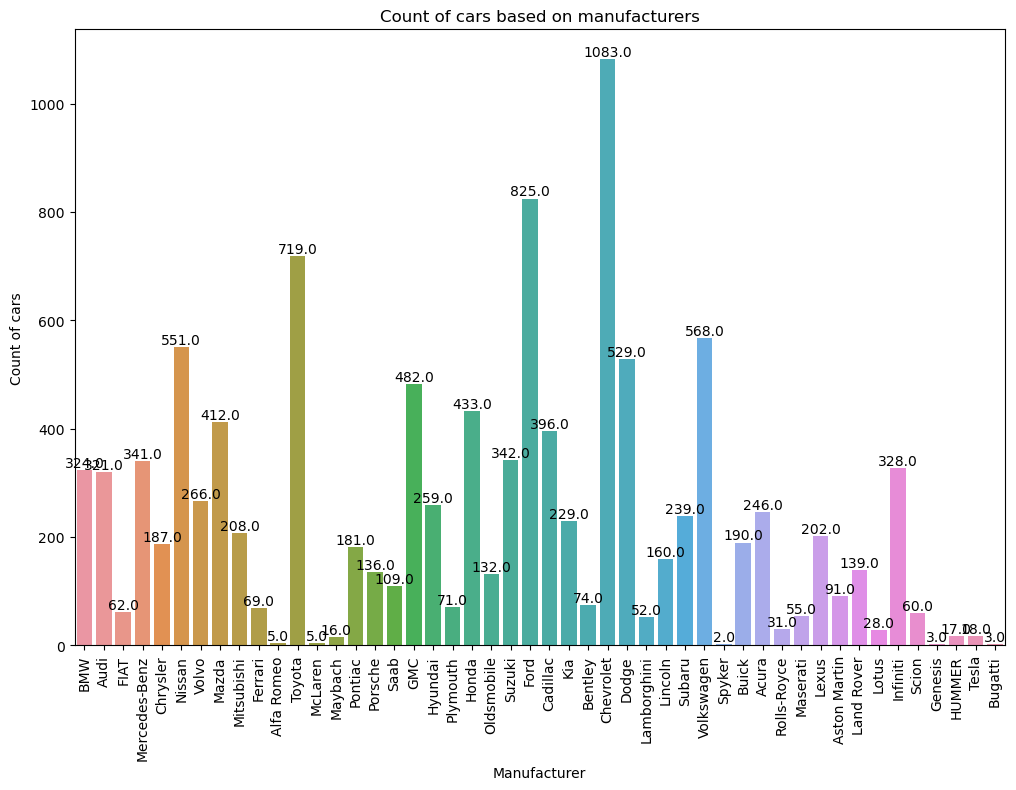

In [29]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'Make', data = car)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

2.Pivot table that shows the number of car models in each market category and their corresponding popularity scores.

In [33]:
dfa = pd.pivot_table(car, values=['Popularity'], index=['Make'], columns =['Market Category'], 
                                aggfunc=np.sum, fill_value = 0)

dfa

Popularity                   \
Market Category  Crossover Crossover,Diesel   
Make                                          
Acura                    0                0   
Alfa Romeo               0                0   
Aston Martin             0                0   
Audi                     0                0   
BMW                      0                0   
Bentley                  0                0   
Bugatti                  0                0   
Buick                 8215                0   
Cadillac                 0                0   
Chevrolet            83100                0   
Chrysler             12156                0   
Dodge                94401                0   
FIAT                 12285                0   
Ferrari                  0                0   
Ford                497816                0   
GMC                  34587                0   
Genesis                  0                0   
HUMMER                   0                0   
Honda               248826                0   
Hyundai              94974                0   
Infiniti                 0                0   
Kia                  96320                0   
Lamborghini              0                0   
Land Rover               0                0   
Lexus                    0                0   
Lincoln                  0                0   
Lotus                    0                0   
Maserati                 0                0   
Maybach                  0                0   
Mazda                59186                0   
McLaren                  0                0   
Mercedes-Benz            0                0   
Mitsubishi           23544                0   
Nissan              158711                0   
Oldsmobile               0                0   
Plymouth                 0                0   
Pontiac               2520                0   
Porsche                  0                0   
Rolls-Royce              0                0   
Saab                     0                0   
Scion                    0                0   
Spyker                   0                0   
Subaru               62720                0   
Suzuki               26455                0   
Tesla                    0                0   
Toyota              123891                0   
Volkswagen           33174             6111   
Volvo                    0                0   

                                                          \
Market Category Crossover,Exotic,Luxury,High-Performance   
Make                                                       
Acura                                                  0   
Alfa Romeo                                             0   
Aston Martin                                           0   
Audi                                                   0   
BMW                                                    0   
Bentley                                                0   
Bugatti                                                0   
Buick                                                  0   
Cadillac                                               0   
Chevrolet                                              0   
Chrysler                                               0   
Dodge                                                  0   
FIAT                                                   0   
Ferrari                                                0   
Ford                                                   0   
GMC                                                    0   
Genesis                                                0   
HUMMER                                                 0   
Honda                                                  0   
Hyundai                                                0   
Infiniti                                               0   
Kia                                                    0   
Lamborghini                                            0   
Land Rover                                             0  

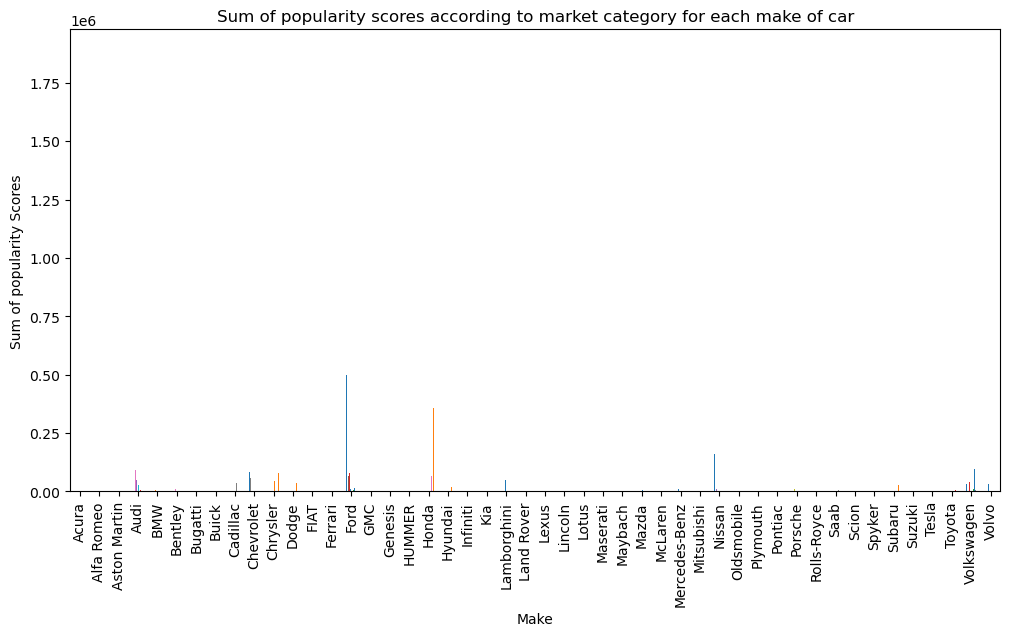

In [39]:
dfa.plot(kind='bar', figsize=(12, 6))

plt.title('Sum of popularity scores according to market category for each make of car')
plt.xlabel('Make')
plt.ylabel('Sum of popularity Scores')
plt.legend().remove()

plt.show()

3. Create a combo chart that visualizes the relationship between market category and popularity.

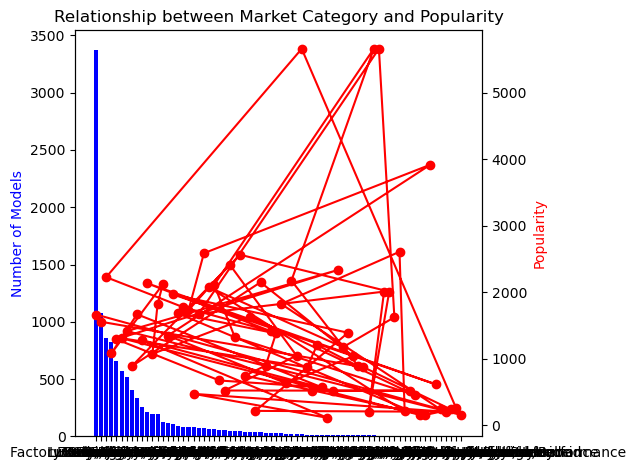

In [40]:
category_popularity = car.groupby('Market Category')['Popularity'].mean()
category_counts = car['Market Category'].value_counts()

fig, ax1 = plt.subplots()

ax1.bar(category_counts.index, category_counts.values, color='b')
ax1.set_ylabel('Number of Models', color='b')

ax2 = ax1.twinx()
ax2.plot(category_popularity.index, category_popularity.values, color='r', marker='o')
ax2.set_ylabel('Popularity', color='r')

plt.title('Relationship between Market Category and Popularity')
plt.xlabel('Market Category')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()



4. Create a scatter chart that plots engine power on the x-axis and price on the y-axis. Add a trendline to the chart to visualize the relationship between these variables.

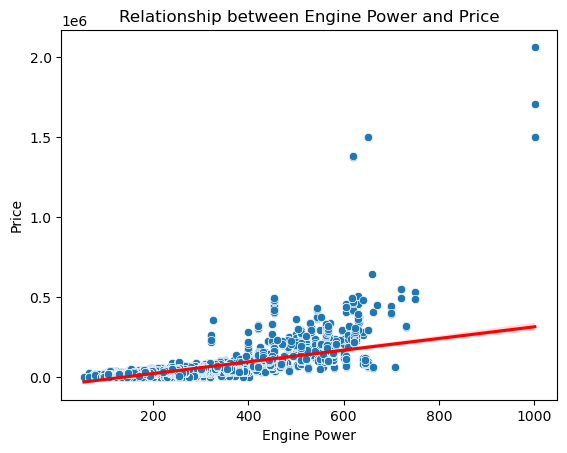

In [41]:
sns.scatterplot(x='Engine HP', y='MSRP', data=car)

sns.regplot(x='Engine HP', y='MSRP', data=car, scatter=False, color='red')

plt.title('Relationship between Engine Power and Price')
plt.xlabel('Engine Power')
plt.ylabel('Price')

plt.show()

5. Identify the variables that have the strongest relationship with a car's price.

In [42]:
df_corr = car_num.corr()
df_corr

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.334334,-0.033038,0.247574,0.244972,0.188417,0.085874,0.209635
Engine HP,0.334334,1.000000,0.756942,-0.127824,-0.345587,-0.345471,0.038650,0.657206
Engine Cylinders,-0.033038,0.756942,1.000000,-0.151101,-0.610338,-0.585333,0.043010,0.533431
Number of Doors,0.247574,-0.127824,-0.151101,1.000000,0.114673,0.120682,-0.057235,-0.144925
highway MPG,0.244972,-0.345587,-0.610338,0.114673,1.000000,0.886299,-0.017159,-0.166631
city mpg,0.188417,-0.345471,-0.585333,0.120682,0.886299,1.000000,-0.000549,-0.162343
Popularity,0.085874,0.038650,0.043010,-0.057235,-0.017159,-0.000549,1.000000,-0.048371
MSRP,0.209635,0.657206,0.533431,-0.144925,-0.166631,-0.162343,-0.048371,1.000000


<Axes: >

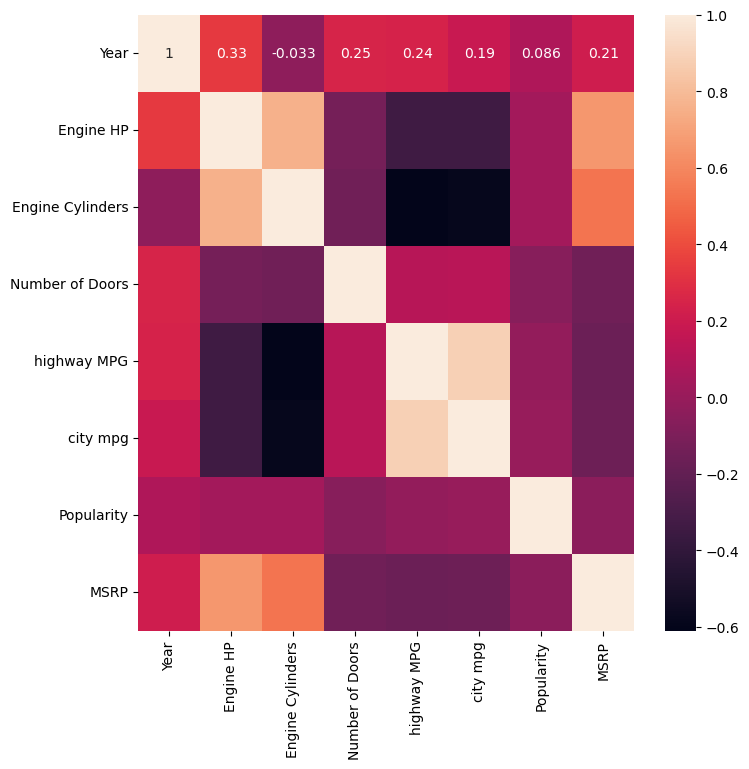

In [46]:
# correlation heat map
plt.figure(figsize=[8,8])
sns.heatmap(df_corr, annot=True)

In [64]:
# Correlated Features with target variable
print('\n--Correlated Features with target variable--\n')
d = print((car_num.corrwith(car_num['MSRP'])).sort_values(ascending=False)[1:])
d


--Correlated Features with target variable--

Engine HP           0.657206
Engine Cylinders    0.533431
Year                0.209635
Popularity         -0.048371
Number of Doors    -0.144925
city mpg           -0.162343
highway MPG        -0.166631
dtype: float64


In [63]:
d.columns = ['Correlation coeff with MSRP']
d

,Correlation coeff with MSRP
Engine HP,0.657206
Engine Cylinders,0.533431
Year,0.209635
Popularity,-0.048371
Number of Doors,-0.144925
city mpg,-0.162343
highway MPG,-0.166631


Create a bar chart that shows the coefficient values for each variable to visualize their relative importance.

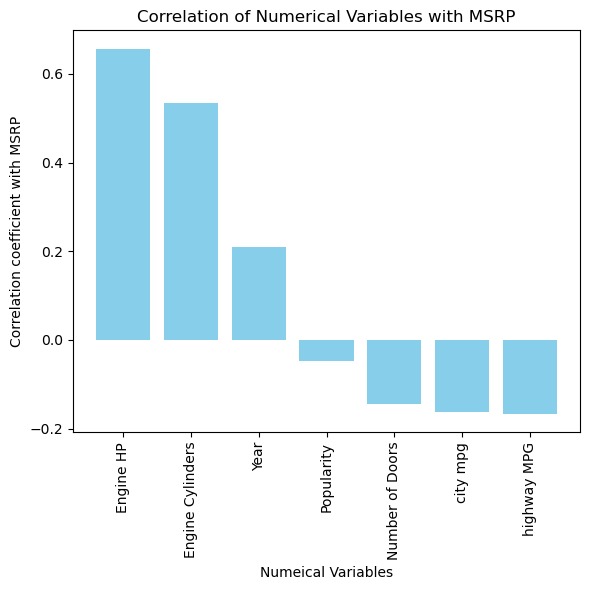

In [75]:
variables = ['Engine HP', 'Engine Cylinders', 'Year', 'Popularity', 'Number of Doors', 'city mpg', 'highway MPG']
correlation_coefficients = [0.657206, 0.533431, 0.209635, -0.048371, -0.144925, -0.162343, -0.166631]

plt.figure(figsize=(6,6)) 
plt.bar(variables, correlation_coefficients, color='skyblue')

plt.xlabel('Numeical Variables')
plt.ylabel('Correlation coefficient with MSRP')
plt.title('Correlation of Numerical Variables with MSRP')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

6.Create a pivot table that shows the average price of cars for each manufacturer. 
  Create a bar chart or a horizontal stacked bar chart that visualizes the relationship between manufacturer and average price.

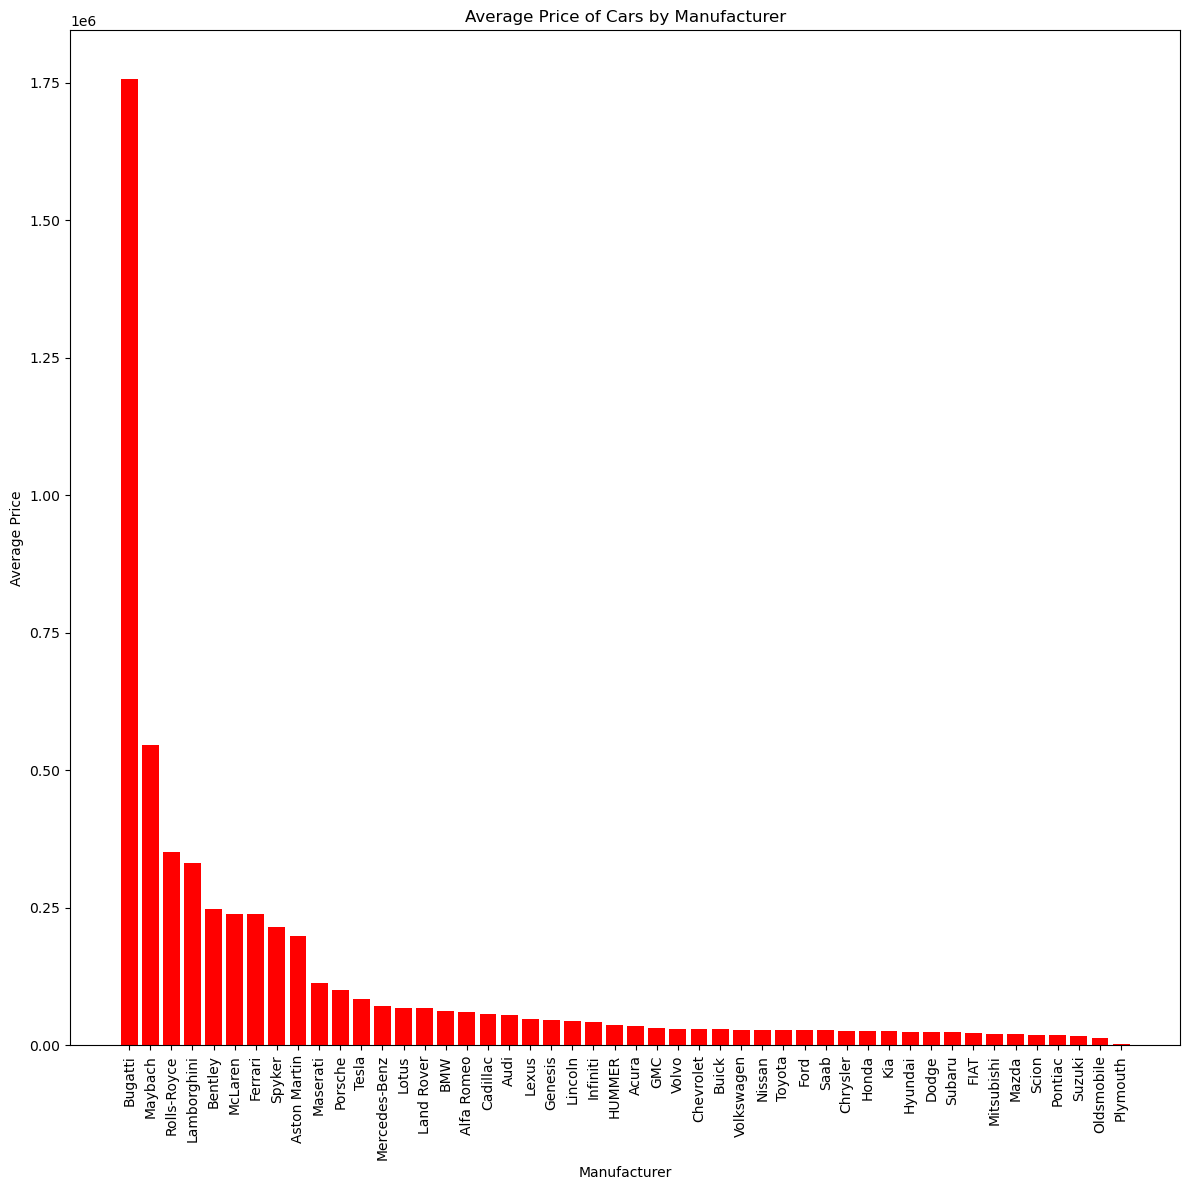

In [71]:
dfb = car.pivot_table(index='Make', values='MSRP', aggfunc='mean')

dfb = dfb.sort_values(by='MSRP', ascending=False)

plt.figure(figsize=(12, 12))  
plt.bar(dfb.index, dfb['MSRP'], color='red')

plt.xlabel('Manufacturer')
plt.xticks(rotation=90)
plt.ylabel('Average Price')
plt.title('Average Price of Cars by Manufacturer')

plt.tight_layout()
plt.show()


7. Create a scatter plot with the number of cylinders on the x-axis and highway MPG on the y-axis.
Create a trendline on the scatter plot to visually estimate the slope of the relationship and assess its significance.


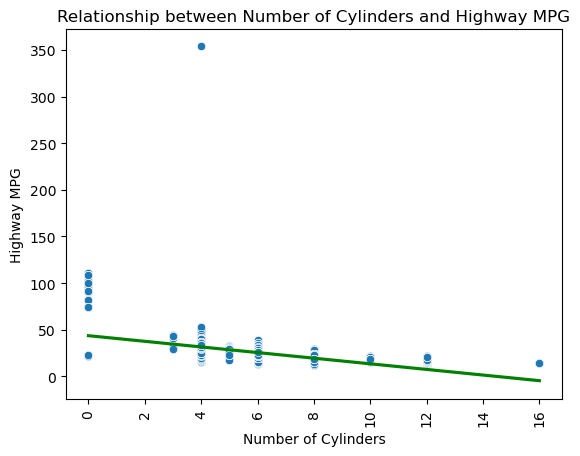

In [72]:
sns.scatterplot(x='Engine Cylinders', y='highway MPG', data=car)

sns.regplot(x='Engine Cylinders', y='highway MPG', data=car, scatter=False, color='green')

plt.xlabel('Number of Cylinders')
plt.xticks(rotation=90)
plt.ylabel('Highway MPG')
plt.title('Relationship between Number of Cylinders and Highway MPG')

plt.show()

7. Calculate the correlation coefficient between the number of cylinders and highway MPG to quantify the strength and direction of the relationship.

In [74]:
correlation_coefficient = car['Engine Cylinders'].corr(car['highway MPG'])

print("Correlation coefficient between number of cylinders and highway MPG:", correlation_coefficient)

Correlation coefficient between number of cylinders and highway MPG: -0.6103377931439015


In [77]:
car.to_csv(r'C:\Users\Swagatika Samal\Desktop\TRAINITY\PYTHON\CAR_DATA\car.csv')